In [1]:
def euler(f, a, b, n, ya):
    """
    Calculate the solution of the initial-value problem from Euler method
    Parameters:
        f: Function f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Initial value
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    vx = np.zeros(n)
    vy = np.zeros((n,2))

    h = (b - a) / n
    x = a
    y = ya

    vx[0] = x
    vy[0] = y

    fxy = f(y)
    print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(0, x, y[0][0], y[0][1]), end="")

    for i in range(0, n):
        
        x = a + (i + 1) * h
        y = np.add(y, h * fxy, out=y, casting="unsafe").reshape((1,2))

        fxy = f(y)
        print("i: {:03d}\t t: {:.4f}\t x: {:.4f}\t v: {:.4f}\n".format(i + 1, x, y[0][0], y[0][1]), end="")
        vx[i] = x
        vy[i] = y
        

    return [vx, vy]



def rk4_system(f, a, b, n, ya):
    """
    Calculate the solution of systems of differential equations from
    Runge-Kutta (Order Four) method.
    Parameters:
        f: Array of functions f(x)
        a: Initial point
        b: End point
        n: Number of intervals
        ya: Array of initial values
    Returns:
        vx: Array containing x values
        vy: Array containing y values (solution of IVP)
    """

    m = len(f)

    k = [np.zeros(m), np.zeros(m), np.zeros(m), np.zeros(m)]

    vx = np.zeros(n + 1)
    vy = np.zeros((m, n + 1))

    h = (b - a) / n

    x = a
    y = ya

    vx[0] = x
    vy[:, 0] = y

    for i in range(0, n):

        for j in range(0, m):
            k[0][j] = h * f[j](x, y)

        for j in range(0, m):
            k[1][j] = h * f[j](x + h / 2, y + k[0] / 2)

        for j in range(0, m):
            k[2][j] = h * f[j](x + h / 2, y + k[1] / 2)

        for j in range(0, m):
            k[3][j] = h * f[j](x + h, y + k[2])

        x = a + i * h
        y = y + (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6

        vx[i + 1] = x
        vy[:, i + 1] = y

    return [vx, vy]

In [2]:
import numpy as np 

def f(X):
    
    return np.array([X[0][1], - 4*X[0][0]]).reshape(1,2)

t, X = euler(f, 0, 4, 32, np.array([1, 10e-12]).reshape(1,2))

i: 000	 t: 0.0000	 x: 1.0000	 v: 0.0000
i: 001	 t: 0.1250	 x: 1.0000	 v: -0.5000
i: 002	 t: 0.2500	 x: 0.9375	 v: -1.0000
i: 003	 t: 0.3750	 x: 0.8125	 v: -1.4687
i: 004	 t: 0.5000	 x: 0.6289	 v: -1.8750
i: 005	 t: 0.6250	 x: 0.3945	 v: -2.1895
i: 006	 t: 0.7500	 x: 0.1208	 v: -2.3867
i: 007	 t: 0.8750	 x: -0.1775	 v: -2.4471
i: 008	 t: 1.0000	 x: -0.4834	 v: -2.3584
i: 009	 t: 1.1250	 x: -0.7782	 v: -2.1167
i: 010	 t: 1.2500	 x: -1.0428	 v: -1.7276
i: 011	 t: 1.3750	 x: -1.2587	 v: -1.2062
i: 012	 t: 1.5000	 x: -1.4095	 v: -0.5769
i: 013	 t: 1.6250	 x: -1.4816	 v: 0.1279
i: 014	 t: 1.7500	 x: -1.4656	 v: 0.8687
i: 015	 t: 1.8750	 x: -1.3570	 v: 1.6015
i: 016	 t: 2.0000	 x: -1.1569	 v: 2.2800
i: 017	 t: 2.1250	 x: -0.8718	 v: 2.8584
i: 018	 t: 2.2500	 x: -0.5145	 v: 3.2944
i: 019	 t: 2.3750	 x: -0.1027	 v: 3.5516
i: 020	 t: 2.5000	 x: 0.3412	 v: 3.6030
i: 021	 t: 2.6250	 x: 0.7916	 v: 3.4324
i: 022	 t: 2.7500	 x: 1.2206	 v: 3.0366
i: 023	 t: 2.8750	 x: 1.6002	 v: 2.4263
i: 024	 t: 3.00

In [3]:
# case one ; c = 5 (under damped) - rk4 method

F = [lambda t, X : X[0][1], lambda t, X : -4*X[0][0]]

     
trk4, X_rk4 = rk4_system(F, 0, 4, 32, np.array([1, 10e-12]).reshape(1,2))

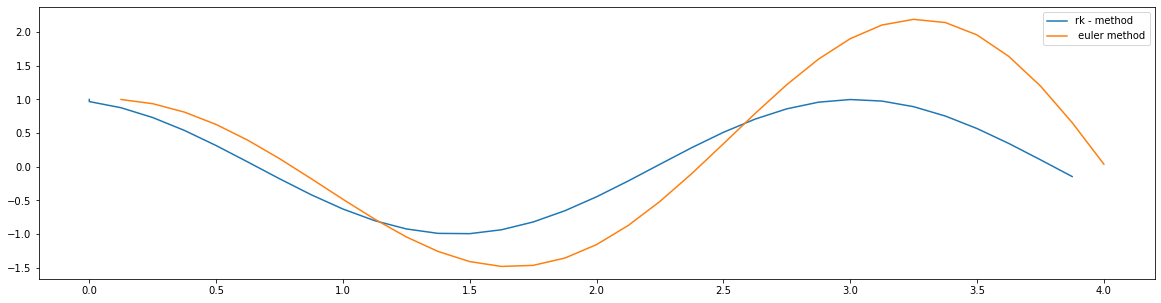

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.plot(trk4, X_rk4[0, :], label = 'rk - method')
plt.plot(t, X[:, 0], label = ' euler method')

plt.legend()

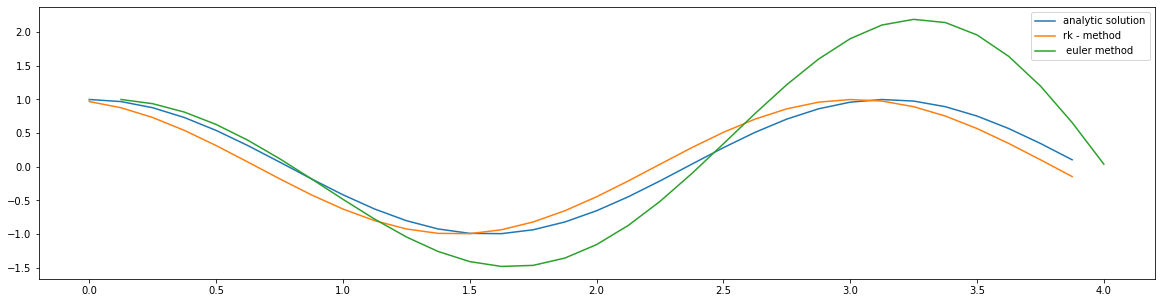

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.plot(trk4, np.cos(2*trk4), label = 'analytic solution')

plt.plot(trk4, X_rk4[0, :], label = 'rk - method')
plt.plot(t, X[:, 0], label = ' euler method')

plt.legend()